In [1]:
%load_ext autoreload
%autoreload 2
from wd_setup import WhiteDwarf
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import decay

In [181]:
from constants import *
def iterate(rhoc_scaled, k, max_iter=10, epsilon=5e-4, DEBUG=False, **kwargs):
    wd = WhiteDwarf(Ye=0.5, rhoc_scaled=rhoc_scaled, Z=6, k=k, **kwargs)
    wd.hydro_integrate(DEBUG=DEBUG)
    para0 = wd.thermo_integrate(DEBUG=DEBUG)
    print(f"r (km) {wd.rbar2r(para0[0]):.3e}, rho (g/cc): {wd.rhobar2rho(para0[1]):.3e}, M (Msolar): {wd.mbar2m(para0[2]):.3e}, T (K): {(para0[3] * wd.rho0 * c ** 2/ a) ** 0.25:.3e}, Luminosity: {wd.p_decay.luminosity(proton_energy, wd.M_profile[-1] * wd.M0):.3e}")

    print("Finished initial setup.\n")
    for n in range(max_iter):
        print(f"Round {n}: hydro")
        wd.hydro_integrate(DEBUG=DEBUG)
        print(f"Round {n}: thermal")
        para = wd.thermo_integrate(DEBUG=DEBUG)
        print(f"r (km) {wd.rbar2r(para[0]):.3e}, rho (g/cc): {wd.rhobar2rho(para[1]):.3e}, M (Msolar): {wd.mbar2m(para[2]):.3e}, T (K): {(para[3] * wd.rho0/ a) ** 0.25:.3e}, Luminosity: {wd.p_decay.luminosity(proton_energy, wd.M_profile[-1] * wd.M0):.3e}")
        

        eps = np.nanmax(np.abs(para-para0)/para0)
        if (eps <= epsilon).all():
            print(f"Epsilon: {np.mean(eps):.3e}, Converges, BREAK")
            return wd
            
        else:
            print(f"Finished iter: {n}, epsilon: {np.mean(eps):.3e} CONTINUE")
            para0 = para

    print("===== DOESN'T CONVERGE =====")
    return wd

In [ ]:
radiation = decay.proton_decay(k=1e-40)
wd = WhiteDwarf(Ye=0.5, rhoc_scaled=1e1, Z=6, decay=radiation)

-5.126454791755227e-39
-5.126454791755227e-39
-5.129725256999553e-39
-5.129725256999553e-39
-5.1329957222438795e-39
-5.1329957222438795e-39
-5.1329957222438795e-39
-1.2764452729227646e-38
-1.2764452729227646e-38
-2.0395909736211414e-38
-2.0395909736211414e-38
-2.0395909736211414e-38
-3.2942404998914397e-38
-3.2942404998914397e-38
-4.5488900261617385e-38
-4.5488900261617385e-38
-4.5488900261617385e-38
-5.987263234879878e-38
-5.987263234879878e-38
-7.425636443598016e-38
-7.425636443598016e-38
-7.425636443598016e-38
-9.02125486115888e-38
-9.02125486115888e-38
-1.0616873278719747e-37
-1.0616873278719747e-37
-1.0616873278719747e-37
-1.235270588722223e-37
-1.235270588722223e-37
-1.4088538495724712e-37
-1.4088538495724712e-37
-1.4088538495724712e-37
-1.5952696065009925e-37
-1.5952696065009925e-37
-1.781685363429514e-37
-1.781685363429514e-37
-1.781685363429514e-37
-1.9800505444532046e-37
-1.9800505444532046e-37
-2.1784157254768955e-37
-2.1784157254768955e-37
-2.1784157254768955e-37
-2.3880454

In [ ]:
wd = iterate(1e1, 9e-46)

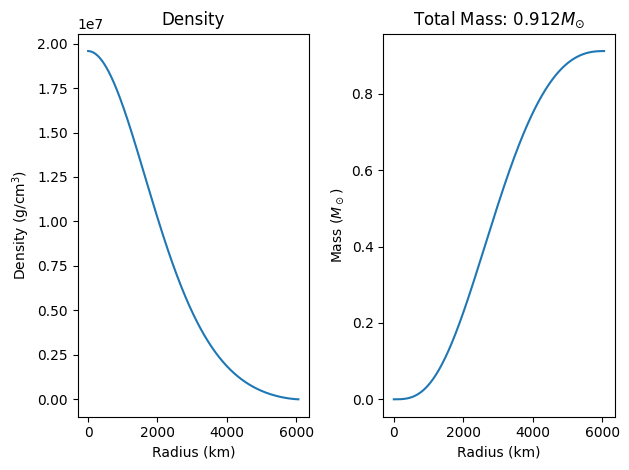

In [362]:
wd_0.plot()

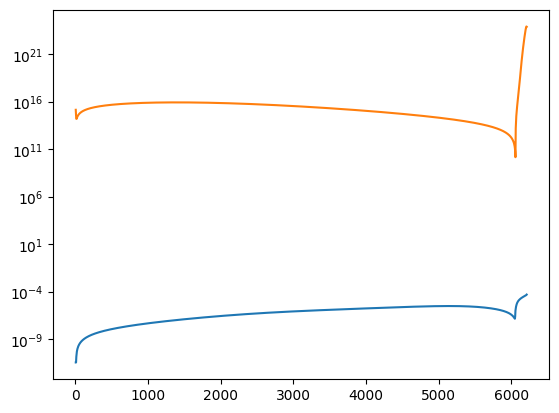

In [411]:
END=len(wd.R_profile) - 2
plt.plot(wd.rbar2r(wd.R_profile)[:END], np.abs(wd.debug_profile[:, 1] * wd.rho0 * c ** 2 / wd.R0 / a / wd.T_profile ** 3)[:END])
plt.plot(wd.rbar2r(wd.R_profile)[:END], np.abs(wd.debug_profile[:, 0])[:END])
plt.yscale('log')

In [299]:
wd = WhiteDwarf(Ye=0.5, rhoc_scaled=1, Z=6, k=1e-40)
wd.hydro_integrate(DEBUG=False)
para0 = wd.thermo_integrate(DEBUG=False)

Finish setting up white dwarf parameters 



/Users/caritsang/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/01 Project/FYP_Sem1/proton_decay/wd_setup.py:80: RuntimeWarning: overflow encountered in scalar multiply
  t2 = 1 + 4 * np.pi * (r ** 3) * P / (m * c ** 2)
/Users/caritsang/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/01 Project/FYP_Sem1/proton_decay/wd_setup.py:26: RuntimeWarning: invalid value encountered in scalar divide
  self.M0 = 5.67e33 * (Ye ** 2)


Backward Integration: Surface T: 6.100e-01 K


Text(0.5, 1.0, 'First Iteration')

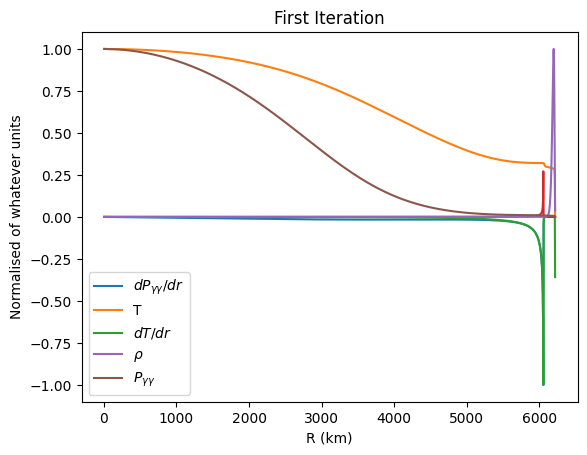

In [415]:
#plt.plot(wd.R_profile,np.abs(wd.debug_profile[:, 2]))
#plt.plot(wd.R_profile, np.abs(wd.dPdr_photon_profile * wd.rho0 * c ** 2))
tmp = wd.p_decay.photon_pressure(E_gamma=proton_energy, r=wd.R_profile * wd.R0, m=wd.M_profile * wd.M0, T=wd.T_profile, rho=wd.rho_profile * wd.rho0,)
plt.plot(wd.rbar2r(wd.R_profile), tmp/min(tmp) * np.sign(tmp), label=r"$dP_{\gamma\gamma}/dr$")
plt.plot(wd.rbar2r(wd.R_profile) ,wd.T_profile/max(wd.T_profile), label='T')
tmp2 = tmp/wd.T_profile ** 3
plt.plot(wd.rbar2r(wd.R_profile), tmp2/min(tmp2) * np.sign(tmp2), label=r'$dT/dr$')
tmp3 = wd.T_profile / (wd.rho_profile * wd.rho0 / 1000) ** (2/3)
plt.plot(wd.rbar2r(wd.R_profile), tmp3/1241)
plt.plot(wd.rbar2r(wd.R_profile), wd.rho_profile / max(wd.rho_profile), label=r'$\rho$')
plt.plot(wd.rbar2r(wd.R_profile), wd.P_photon_profile / max(wd.P_photon_profile), label=r"$P_{\gamma\gamma}$")
plt.xlabel("R (km)")
plt.ylabel("Normalised of whatever units")
plt.legend()
plt.title("First Iteration")

Text(0.5, 1.0, 'Second Iteration')

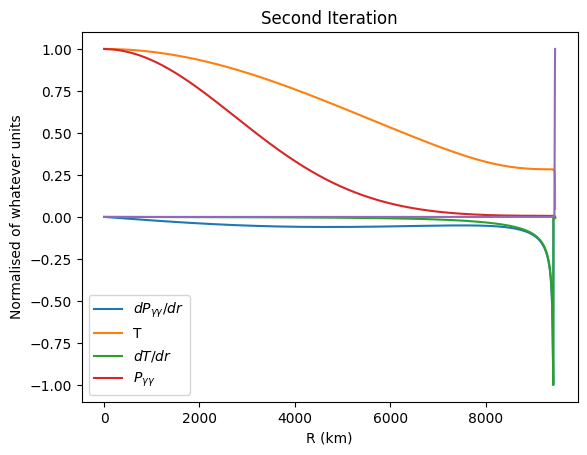

In [297]:
#plt.plot(wd.R_profile,np.abs(wd.debug_profile[:, 2]))
#plt.plot(wd.R_profile, np.abs(wd.dPdr_photon_profile * wd.rho0 * c ** 2))
tmp = wd.p_decay.photon_pressure(E_gamma=proton_energy, r=wd.R_profile * wd.R0, m=wd.M_profile * wd.M0, T=wd.T_profile, rho=wd.rho_profile * wd.rho0,)
plt.plot(wd.rbar2r(wd.R_profile), tmp/min(tmp) * np.sign(tmp), label=r"$dP_{\gamma\gamma}/dr$")
plt.plot(wd.rbar2r(wd.R_profile) ,wd.T_profile/max(wd.T_profile), label='T')
tmp2 = tmp/wd.T_profile ** 3
plt.plot(wd.rbar2r(wd.R_profile), tmp2/min(tmp2) * np.sign(tmp2), label=r'$dT/dr$')
plt.plot(wd.rbar2r(wd.R_profile), wd.P_photon_profile / max(wd.P_photon_profile), label=r"$P_{\gamma\gamma}$")
plt.plot(wd.rbar2r(wd.R_profile), wd.M_profile / max(wd.M_profile))
plt.xlabel("R (km)")
plt.ylabel("Normalised of whatever units")
plt.legend()
plt.title("Second Iteration")

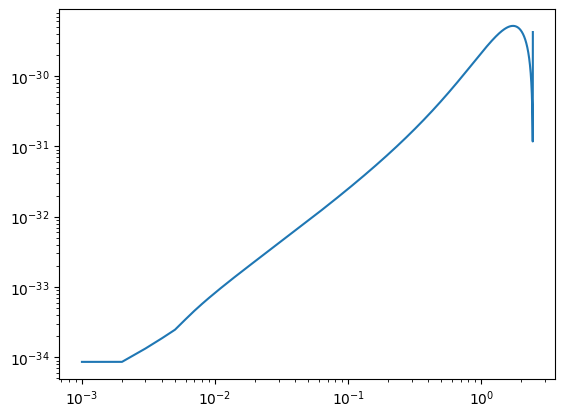

In [303]:
plt.loglog(wd.R_profile,np.abs(wd.dPdr_photon_profile))

In [212]:
def get_Tlist():
    k_list = np.logspace(-29, -28, 5)
    R_list = []
    T_list = []
    L_list = []
    M_list = []
    for k in k_list:    
        wd = iterate(1.5e3, k)
        T_list.append(wd.T_profile[-1])
        R_list.append(wd.rbar2r(wd.R_profile[-1]))
        L_list.append(wd.p_decay.luminosity(proton_energy, wd.M_profile[-1] * wd.M0))
        M_list.append(wd.mbar2m(wd.M_profile[-1]))
        print(f"k: {k:.3e}, R (km): {wd.rbar2r(wd.R_profile[-1]):.3e}, T (K): {(wd.T_profile[-1] * wd.rho0/ a) ** 0.25:.3e}, L (erg/s): {wd.p_decay.luminosity(proton_energy, wd.M_profile[-1] * wd.M0):.3e}")
    return R_list, T_list, L_list, M_list

R_list, T_list, L_list, M_list = get_Tlist()

1500.0
Surface T: 1.005e+03 K
r (km) 1.844e+03, rho (g/cc): 2.409e+03, M (Msolar): 1.386e+00, T (K): 1.969e+05, Luminosity: 2.467e+25
Finished initial setup.
1500.0
Surface T: 1.005e+03 K
r (km) 1.844e+03, rho (g/cc): 2.399e+03, M (Msolar): 1.386e+00, T (K): 1.969e+05, Luminosity: 2.467e+25
Finished iter: 0, epsilon: 4.190e-03 CONTINUE
1500.0
Surface T: 1.005e+03 K
r (km) 1.844e+03, rho (g/cc): 2.399e+03, M (Msolar): 1.386e+00, T (K): 1.969e+05, Luminosity: 2.467e+25
Epsilon: 5.978e-06, Converges, BREAK
k: 1.000e-29, R (km): 1.844e+03, T (K): 9.398e+05, L (erg/s): 2.467e+25
1500.0
Surface T: 1.160e+03 K
r (km) 1.844e+03, rho (g/cc): 2.409e+03, M (Msolar): 1.386e+00, T (K): 1.969e+05, Luminosity: 4.387e+25
Finished initial setup.
1500.0
Surface T: 1.160e+03 K
r (km) 1.844e+03, rho (g/cc): 2.379e+03, M (Msolar): 1.386e+00, T (K): 1.969e+05, Luminosity: 4.387e+25
Finished iter: 0, epsilon: 1.269e-02 CONTINUE
1500.0
Surface T: 1.160e+03 K
r (km) 1.844e+03, rho (g/cc): 2.379e+03, M (Msolar)

Text(0, 0.5, 'T / $\\rho^2/3$ (K m$^2$)')

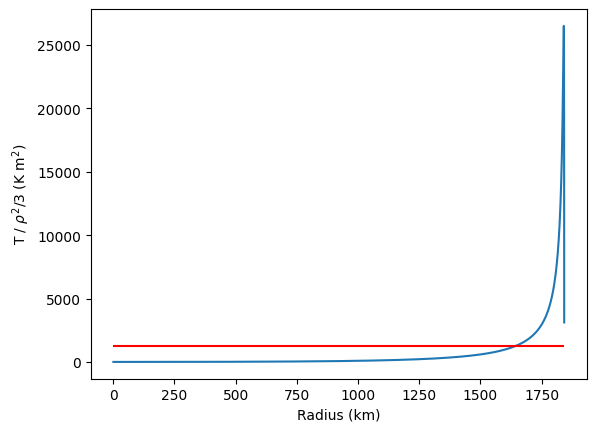

In [208]:
plt.plot(wd.rbar2r(wd.R_profile),( wd.T_profile / ((wd.rho_profile * wd.rho0 / 1000) ** (2/3))))
plt.hlines(1261, 0, max(wd.rbar2r(wd.R_profile)), colors='r')
plt.xlabel("Radius (km)")
plt.ylabel(r"T / $\rho^2/3$ (K m$^2$)")

0.1


0.1977720717985462

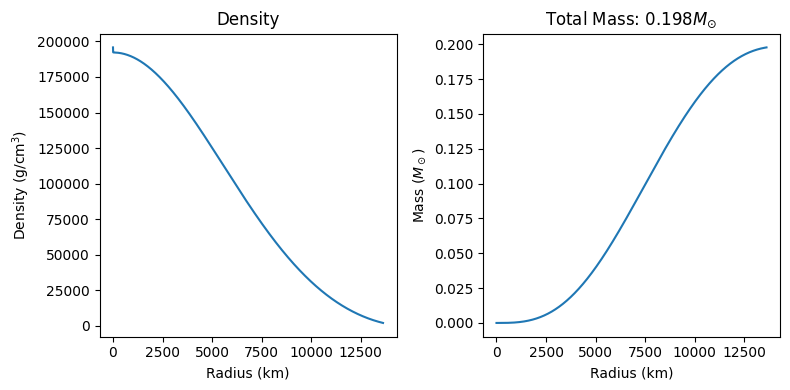

In [178]:
wd_k0 = WhiteDwarf(Ye=0.5, rhoc_scaled=1e-1, Z=6, k=0, P0=0, T0=0)
wd_k0.hydro_integrate(DEBUG=False)
wd_k0.plot(figsize=(8,4))
wd_k0.mbar2m(wd_k0.M_profile[-1])

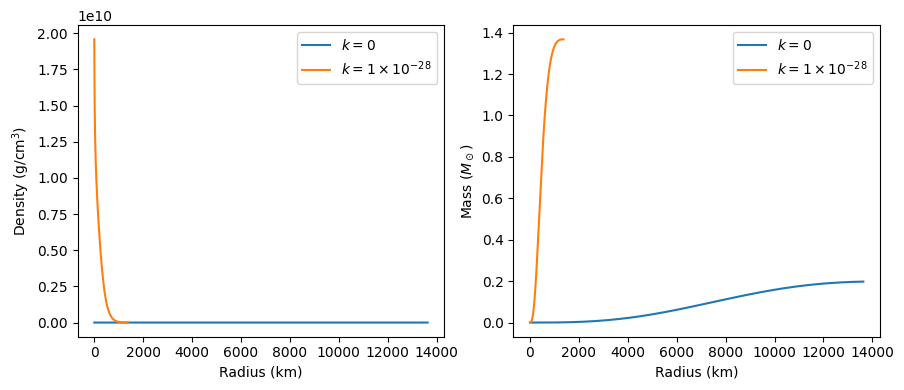

In [118]:
def compare(wd1, wd2, label1='', label2=''):
    fig, axes = plt.subplots(1,2, figsize=(9, 4))
    ax1 = wd1.plot_profile('rho', ax=axes[0], label=label1)
    ax1 = wd2.plot_profile('rho', ax=ax1, label=label2)
    ax1.legend()
    ax1.set_title("")

    ax2 = wd1.plot_profile('M', ax=axes[1], label=label1)
    ax2 = wd2.plot_profile('M', ax=ax2, label=label2)
    ax2.legend()
    ax2.set_title("")

    plt.tight_layout()
compare(wd_k0, wd, r'$k=0$', r"$k=1\times10^{-28}$")

Text(0, 0.5, 'Pressure')

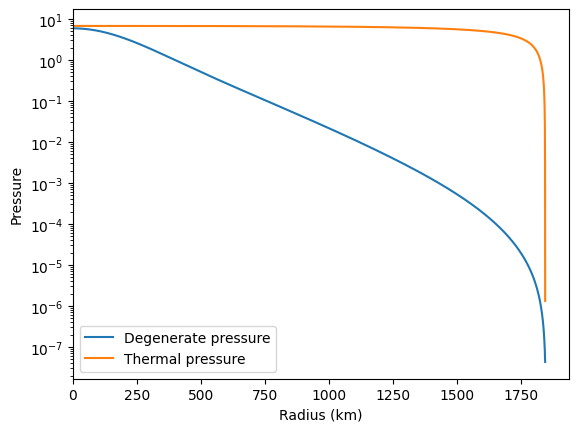

In [214]:
#plt.plot(wd.rbar2r(wd.R_profile), (wd.P_photon_profile), label='photon pressure')

#plt.plot(wd_k0.rbar2r(wd_k0.R_profile), wd_k0.debug_profile[:, 3], label='Degenerate pressure')
plt.plot(wd.rbar2r(wd.R_profile), np.abs(wd.debug_profile[:, 3]), label='Degenerate pressure')
plt.plot(wd.rbar2r(wd.R_profile), np.abs(wd.P_photon_profile), label='Thermal pressure')
#plt.plot(wd.rbar2r(wd.R_profile), wd.debug_profile[:, 4], label='Photon pressure')
#plt.plot(wd.rbar2r(wd.R_profile)[:-1], wd.P_photon_profile, label='Photon pressure')
plt.yscale('log')
#plt.xlim(0, wd.rbar2r(wd.R_profile[-1]))
#plt.xscale('log')
plt.legend()
plt.xlim(0, wd.rbar2r(wd.R_profile[-1])*1.05)
plt.xlabel("Radius (km)")
plt.ylabel("Pressure")

In [216]:
wd.debug_profile[:, 1]

array([ -0.90960471, -15.40734187,  -5.7985184 , ...,   0.        ,
         0.        ,   0.        ])

(0.0, 1934.4968999998534)

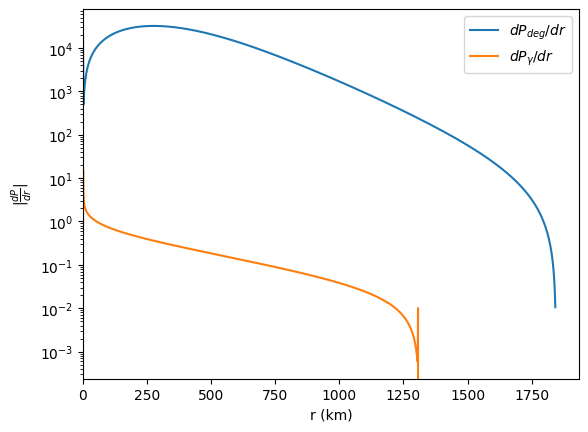

In [215]:
plt.plot(wd.rbar2r(wd.R_profile), np.abs(wd.debug_profile[:, 0]), label=r"$dP_{deg}/dr$")
plt.plot(wd.rbar2r(wd.R_profile), np.abs(wd.debug_profile[:, 1]), label=r"$dP_\gamma/dr$")
#plt.plot(wd.rbar2r(wd.R_profile), np.abs(wd.debug_profile[:, 1]), label="dP/dr from proton decay")
plt.yscale('log')
plt.ylabel(r"$|\frac{dP}{dr}|$")
plt.xlabel("r (km)")
plt.legend()
plt.xlim(0, wd.rbar2r(wd.R_profile[-1])*1.05)

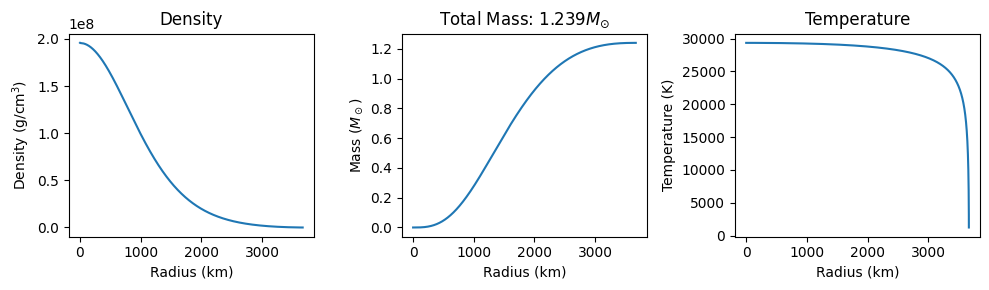

In [ ]:
wd.plot(figsize=(10, 3))

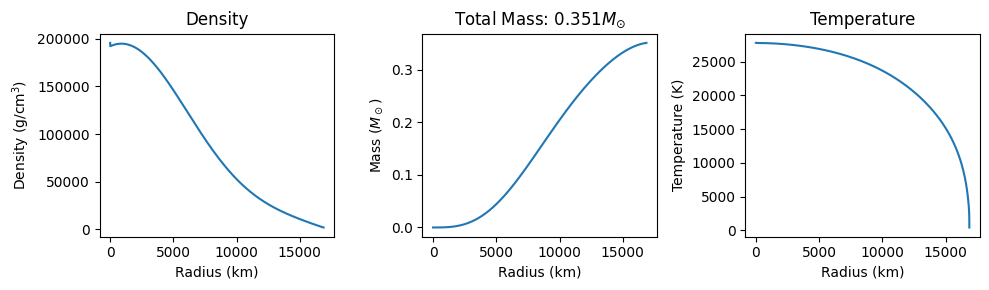

In [ ]:
wd.plot(figsize=(10, 3))

In [218]:
def get_MR(k, start=-1, end=3):
    if k == 0:
        R = []
        M = []
        rho_range = np.logspace(start, end, 10)
        for rho in tqdm(rho_range):
            wd = WhiteDwarf(Ye=0.5, rhoc_scaled=rho, Z=6, k=k, P0=0, T0=0)
            wd.hydro_integrate()
            R.append(wd.rbar2r(wd.R_profile[-1]))
            M.append(wd.mbar2m(wd.M_profile[-1]))
        return np.array(R), np.array(M)
    else:

        R = []
        M = []
        T = []
        rho_range = np.logspace(start, end, 10)
        for rho in tqdm(rho_range):
            wd = iterate(rho, k)
            wd.hydro_integrate()
            R.append(wd.rbar2r(wd.R_profile[-1]))
            M.append(wd.mbar2m(wd.M_profile[-1]))
            T.append(wd.T_profile[-1])

    return np.array(R), np.array(M), np.array(T)

In [75]:
df = pd.read_csv("/Users/caritsang/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/01 Project/FYP_Sem1/proton_decay/MWDD-export.csv", delimiter=',', encoding='')
df = df.dropna(subset=df.columns)
df.head
M_SOLAR = 1.989e+30
G = 6.674e-11

def g2r(surface_g, mass):
    g = 10 ** surface_g / 100
    mass_kg = mass * M_SOLAR

    radius = np.sqrt(G * mass_kg / g)

    return radius / 1000 # m to km
radius = g2r(df['logg'], df['mass'])
df['radius'] = radius

/Users/caritsang/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [152]:
np.logspace(-29, -28, 5)

array([1.00000000e-29, 1.77827941e-29, 3.16227766e-29, 5.62341325e-29,
       1.00000000e-28])

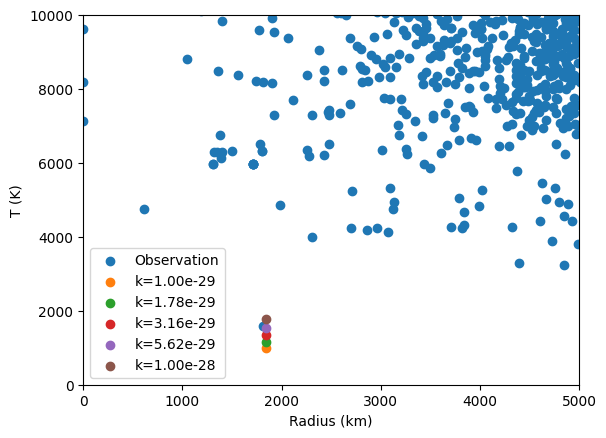

In [213]:
plt.scatter(df['radius'], df['teff'], label="Observation")
k_list = np.logspace(-29, -28, 5)
for i, k in enumerate(k_list):
    plt.scatter(R_list[i], T_list[i], label=f"k={k:.2e}")
plt.xlim(0, 5e3)
plt.ylim(0, 1e4)
plt.xlabel("Radius (km)")
plt.ylabel(r"T (K)")
plt.legend()

In [225]:
#R1, M1, T1 = get_MR(1e-28, -2.5, 0)
#R2, M2, T2 = get_MR(5e-29, -2, 0)
R3, M3, T3 = get_MR(7.5e-29, -2, 0)

  0%|          | 0/10 [00:00<?, ?it/s]

0.01
Surface T: 2.510e+02 K
r (km) 1.642e+04, rho (g/cc): 1.958e+03, M (Msolar): 5.712e-02, T (K): 8.872e+04, Luminosity: 7.623e+24
Finished initial setup.
0.01
Surface T: 2.373e+02 K
r (km) 1.090e+04, rho (g/cc): 1.958e+03, M (Msolar): 2.012e-02, T (K): 6.834e+04, Luminosity: 2.685e+24
Finished iter: 0, epsilon: 1.839e+00 CONTINUE
0.01
Surface T: 2.442e+02 K
r (km) 1.547e+04, rho (g/cc): 1.958e+03, M (Msolar): 4.546e-02, T (K): 8.379e+04, Luminosity: 6.067e+24
Finished iter: 1, epsilon: 5.575e-01 CONTINUE
0.01
Surface T: 2.389e+02 K
r (km) 1.179e+04, rho (g/cc): 1.958e+03, M (Msolar): 2.418e-02, T (K): 7.156e+04, Luminosity: 3.227e+24
Finished iter: 2, epsilon: 8.803e-01 CONTINUE
0.01
Surface T: 2.434e+02 K
r (km) 1.470e+04, rho (g/cc): 1.958e+03, M (Msolar): 4.045e-02, T (K): 8.138e+04, Luminosity: 5.399e+24
Finished iter: 3, epsilon: 4.023e-01 CONTINUE
0.01
Surface T: 2.393e+02 K
r (km) 1.258e+04, rho (g/cc): 1.958e+03, M (Msolar): 2.769e-02, T (K): 7.403e+04, Luminosity: 3.695e+24


 10%|█         | 1/10 [00:46<07:01, 46.88s/it]

0.016681005372000592
Surface T: 2.737e+02 K
r (km) 1.624e+04, rho (g/cc): 1.958e+03, M (Msolar): 7.909e-02, T (K): 9.624e+04, Luminosity: 1.056e+25
Finished initial setup.
0.016681005372000592
Surface T: 2.670e+02 K
r (km) 1.192e+04, rho (g/cc): 1.958e+03, M (Msolar): 3.860e-02, T (K): 8.044e+04, Luminosity: 5.152e+24
Finished iter: 0, epsilon: 1.049e+00 CONTINUE
0.016681005372000592
Surface T: 2.679e+02 K
r (km) 1.542e+04, rho (g/cc): 1.958e+03, M (Msolar): 6.533e-02, T (K): 9.175e+04, Luminosity: 8.720e+24
Finished iter: 1, epsilon: 4.092e-01 CONTINUE
0.016681005372000592
Surface T: 2.671e+02 K
r (km) 1.268e+04, rho (g/cc): 1.958e+03, M (Msolar): 4.374e-02, T (K): 8.299e+04, Luminosity: 5.838e+24
Finished iter: 2, epsilon: 4.937e-01 CONTINUE
0.016681005372000592
Surface T: 2.681e+02 K
r (km) 1.478e+04, rho (g/cc): 1.958e+03, M (Msolar): 6.025e-02, T (K): 8.991e+04, Luminosity: 8.041e+24
Finished iter: 3, epsilon: 2.740e-01 CONTINUE
0.016681005372000592
Surface T: 2.665e+02 K
r (km) 1

 20%|██        | 2/10 [01:31<06:02, 45.30s/it]

0.027825594022071243
Surface T: 2.989e+02 K
r (km) 1.571e+04, rho (g/cc): 1.958e+03, M (Msolar): 1.053e-01, T (K): 1.034e+05, Luminosity: 1.405e+25
Finished initial setup.
0.027825594022071243
Surface T: 2.972e+02 K
r (km) 1.268e+04, rho (g/cc): 1.958e+03, M (Msolar): 6.698e-02, T (K): 9.232e+04, Luminosity: 8.939e+24
Finished iter: 0, epsilon: 5.715e-01 CONTINUE
0.027825594022071243
Surface T: 2.945e+02 K
r (km) 1.491e+04, rho (g/cc): 1.958e+03, M (Msolar): 8.923e-02, T (K): 9.918e+04, Luminosity: 1.191e+25
Finished iter: 1, epsilon: 2.494e-01 CONTINUE
0.027825594022071243
Surface T: 2.959e+02 K
r (km) 1.339e+04, rho (g/cc): 1.958e+03, M (Msolar): 7.330e-02, T (K): 9.443e+04, Luminosity: 9.783e+24
Finished iter: 2, epsilon: 2.173e-01 CONTINUE
0.027825594022071243
Surface T: 2.969e+02 K
r (km) 1.420e+04, rho (g/cc): 1.958e+03, M (Msolar): 8.363e-02, T (K): 9.759e+04, Luminosity: 1.116e+25
Finished iter: 3, epsilon: 1.235e-01 CONTINUE
0.027825594022071243
Surface T: 2.937e+02 K
r (km) 1

 30%|███       | 3/10 [08:48<26:09, 224.17s/it]

0.046415888336127774
Surface T: 3.271e+02 K
r (km) 1.496e+04, rho (g/cc): 1.959e+03, M (Msolar): 1.369e-01, T (K): 1.104e+05, Luminosity: 1.827e+25
Finished initial setup.
0.046415888336127774
Surface T: 3.279e+02 K
r (km) 1.305e+04, rho (g/cc): 1.959e+03, M (Msolar): 1.050e-01, T (K): 1.033e+05, Luminosity: 1.402e+25
Finished iter: 0, epsilon: 3.035e-01 CONTINUE
0.046415888336127774
Surface T: 3.250e+02 K
r (km) 1.418e+04, rho (g/cc): 1.958e+03, M (Msolar): 1.198e-01, T (K): 1.068e+05, Luminosity: 1.599e+25
Finished iter: 1, epsilon: 1.233e-01 CONTINUE
0.046415888336127774
Surface T: 3.253e+02 K
r (km) 1.368e+04, rho (g/cc): 1.958e+03, M (Msolar): 1.119e-01, T (K): 1.049e+05, Luminosity: 1.493e+25
Finished iter: 2, epsilon: 7.123e-02 CONTINUE
0.046415888336127774
Surface T: 3.277e+02 K
r (km) 1.368e+04, rho (g/cc): 2.391e+03, M (Msolar): 1.152e-01, T (K): 1.057e+05, Luminosity: 1.537e+25
Finished iter: 3, epsilon: 1.808e-01 CONTINUE
0.046415888336127774
Surface T: 3.282e+02 K
r (km) 1

 40%|████      | 4/10 [48:53<1:48:31, 1085.21s/it]

0.0774263682681127
Surface T: 3.587e+02 K
r (km) 1.409e+04, rho (g/cc): 1.959e+03, M (Msolar): 1.755e-01, T (K): 1.175e+05, Luminosity: 2.342e+25
Finished initial setup.
0.0774263682681127
Surface T: 3.600e+02 K
r (km) 1.299e+04, rho (g/cc): 1.959e+03, M (Msolar): 1.514e-01, T (K): 1.132e+05, Luminosity: 2.020e+25
Finished iter: 0, epsilon: 1.593e-01 CONTINUE
0.0774263682681127
Surface T: 3.590e+02 K
r (km) 1.341e+04, rho (g/cc): 1.958e+03, M (Msolar): 1.593e-01, T (K): 1.147e+05, Luminosity: 2.127e+25
Finished iter: 1, epsilon: 4.992e-02 CONTINUE
0.0774263682681127
Surface T: 3.578e+02 K
r (km) 1.340e+04, rho (g/cc): 1.981e+03, M (Msolar): 1.572e-01, T (K): 1.143e+05, Luminosity: 2.098e+25
Finished iter: 2, epsilon: 1.355e-02 CONTINUE
0.0774263682681127
Surface T: 3.577e+02 K
r (km) 1.340e+04, rho (g/cc): 1.968e+03, M (Msolar): 1.570e-01, T (K): 1.142e+05, Luminosity: 2.095e+25
Finished iter: 3, epsilon: 6.705e-03 CONTINUE
0.0774263682681127
Surface T: 3.578e+02 K
r (km) 1.340e+04, rh

 50%|█████     | 5/10 [1:09:13<1:34:29, 1133.96s/it]

0.1291549665014884
Surface T: 3.938e+02 K
r (km) 1.316e+04, rho (g/cc): 1.959e+03, M (Msolar): 2.223e-01, T (K): 1.246e+05, Luminosity: 2.967e+25
Finished initial setup.
0.1291549665014884
Surface T: 3.949e+02 K
r (km) 1.257e+04, rho (g/cc): 1.960e+03, M (Msolar): 2.051e-01, T (K): 1.221e+05, Luminosity: 2.737e+25
Finished iter: 0, epsilon: 8.368e-02 CONTINUE
0.1291549665014884
Surface T: 3.956e+02 K
r (km) 1.264e+04, rho (g/cc): 1.959e+03, M (Msolar): 2.087e-01, T (K): 1.227e+05, Luminosity: 2.786e+25
Finished iter: 1, epsilon: 1.735e-02 CONTINUE
0.1291549665014884
Surface T: 3.956e+02 K
r (km) 1.264e+04, rho (g/cc): 2.458e+03, M (Msolar): 2.088e-01, T (K): 1.227e+05, Luminosity: 2.787e+25
Finished iter: 2, epsilon: 2.030e-01 CONTINUE
0.1291549665014884
Surface T: 3.957e+02 K
r (km) 1.263e+04, rho (g/cc): 2.468e+03, M (Msolar): 2.089e-01, T (K): 1.227e+05, Luminosity: 2.788e+25
Finished iter: 3, epsilon: 3.952e-03 CONTINUE
0.1291549665014884
Surface T: 3.957e+02 K
r (km) 1.263e+04, rh

 60%|██████    | 6/10 [1:25:50<1:12:28, 1087.20s/it]

0.21544346900318834
Surface T: 4.324e+02 K
r (km) 1.221e+04, rho (g/cc): 1.959e+03, M (Msolar): 2.784e-01, T (K): 1.318e+05, Luminosity: 3.715e+25
Finished initial setup.
0.21544346900318834
Surface T: 4.332e+02 K
r (km) 1.191e+04, rho (g/cc): 1.960e+03, M (Msolar): 2.665e-01, T (K): 1.304e+05, Luminosity: 3.557e+25
Finished iter: 0, epsilon: 4.458e-02 CONTINUE
0.21544346900318834
Surface T: 4.338e+02 K
r (km) 1.191e+04, rho (g/cc): 2.282e+03, M (Msolar): 2.680e-01, T (K): 1.306e+05, Luminosity: 3.577e+25
Finished iter: 1, epsilon: 1.411e-01 CONTINUE
0.21544346900318834
Surface T: 4.340e+02 K
r (km) 1.191e+04, rho (g/cc): 2.335e+03, M (Msolar): 2.683e-01, T (K): 1.306e+05, Luminosity: 3.581e+25
Finished iter: 2, epsilon: 2.266e-02 CONTINUE
0.21544346900318834
Surface T: 4.340e+02 K
r (km) 1.190e+04, rho (g/cc): 2.343e+03, M (Msolar): 2.684e-01, T (K): 1.306e+05, Luminosity: 3.582e+25
Finished iter: 3, epsilon: 3.237e-03 CONTINUE
0.21544346900318834
Surface T: 4.340e+02 K
r (km) 1.190e+

 70%|███████   | 7/10 [1:42:41<53:07, 1062.57s/it]  

0.3593813663804626
Surface T: 4.747e+02 K
r (km) 1.127e+04, rho (g/cc): 1.959e+03, M (Msolar): 3.444e-01, T (K): 1.390e+05, Luminosity: 4.597e+25
Finished initial setup.
0.3593813663804626
Surface T: 4.752e+02 K
r (km) 1.111e+04, rho (g/cc): 1.959e+03, M (Msolar): 3.362e-01, T (K): 1.382e+05, Luminosity: 4.487e+25
Finished iter: 0, epsilon: 2.432e-02 CONTINUE
0.3593813663804626
Surface T: 4.755e+02 K
r (km) 1.111e+04, rho (g/cc): 2.028e+03, M (Msolar): 3.369e-01, T (K): 1.383e+05, Luminosity: 4.496e+25
Finished iter: 1, epsilon: 3.423e-02 CONTINUE
0.3593813663804626
Surface T: 4.755e+02 K
r (km) 1.111e+04, rho (g/cc): 2.055e+03, M (Msolar): 3.370e-01, T (K): 1.383e+05, Luminosity: 4.498e+25
Finished iter: 2, epsilon: 1.321e-02 CONTINUE
0.3593813663804626
Surface T: 4.755e+02 K
r (km) 1.111e+04, rho (g/cc): 2.062e+03, M (Msolar): 3.370e-01, T (K): 1.383e+05, Luminosity: 4.498e+25
Finished iter: 3, epsilon: 3.257e-03 CONTINUE
0.3593813663804626
Surface T: 4.755e+02 K
r (km) 1.111e+04, rh

 80%|████████  | 8/10 [2:01:47<36:18, 1089.07s/it]

0.5994842503189409
Surface T: 5.205e+02 K
r (km) 1.036e+04, rho (g/cc): 1.961e+03, M (Msolar): 4.203e-01, T (K): 1.461e+05, Luminosity: 5.609e+25
Finished initial setup.
0.5994842503189409
Surface T: 5.208e+02 K
r (km) 1.027e+04, rho (g/cc): 1.963e+03, M (Msolar): 4.146e-01, T (K): 1.456e+05, Luminosity: 5.534e+25
Finished iter: 0, epsilon: 1.369e-02 CONTINUE
0.5994842503189409
Surface T: 5.209e+02 K
r (km) 1.027e+04, rho (g/cc): 2.019e+03, M (Msolar): 4.149e-01, T (K): 1.456e+05, Luminosity: 5.538e+25
Finished iter: 1, epsilon: 2.770e-02 CONTINUE
0.5994842503189409
Surface T: 5.210e+02 K
r (km) 1.027e+04, rho (g/cc): 1.972e+03, M (Msolar): 4.150e-01, T (K): 1.457e+05, Luminosity: 5.538e+25
Finished iter: 2, epsilon: 2.337e-02 CONTINUE
0.5994842503189409
Surface T: 5.210e+02 K
r (km) 1.027e+04, rho (g/cc): 1.980e+03, M (Msolar): 4.150e-01, T (K): 1.457e+05, Luminosity: 5.538e+25
Finished iter: 3, epsilon: 3.698e-03 CONTINUE
0.5994842503189409
Surface T: 5.210e+02 K
r (km) 1.027e+04, rh

 90%|█████████ | 9/10 [2:45:41<26:11, 1571.98s/it]

1.0
Surface T: 5.695e+02 K
r (km) 9.483e+03, rho (g/cc): 1.962e+03, M (Msolar): 5.050e-01, T (K): 1.530e+05, Luminosity: 6.740e+25
Finished initial setup.
1.0
Surface T: 5.698e+02 K
r (km) 9.435e+03, rho (g/cc): 1.964e+03, M (Msolar): 5.010e-01, T (K): 1.527e+05, Luminosity: 6.687e+25
Finished iter: 0, epsilon: 7.974e-03 CONTINUE
1.0
Surface T: 5.699e+02 K
r (km) 9.434e+03, rho (g/cc): 1.988e+03, M (Msolar): 5.012e-01, T (K): 1.527e+05, Luminosity: 6.689e+25
Finished iter: 1, epsilon: 1.194e-02 CONTINUE
1.0
Surface T: 5.699e+02 K
r (km) 9.434e+03, rho (g/cc): 1.958e+03, M (Msolar): 5.012e-01, T (K): 1.527e+05, Luminosity: 6.689e+25
Finished iter: 2, epsilon: 1.508e-02 CONTINUE
1.0
Surface T: 5.699e+02 K
r (km) 9.433e+03, rho (g/cc): 1.967e+03, M (Msolar): 5.012e-01, T (K): 1.527e+05, Luminosity: 6.689e+25
Finished iter: 3, epsilon: 4.634e-03 CONTINUE
1.0
Surface T: 5.699e+02 K
r (km) 9.433e+03, rho (g/cc): 1.976e+03, M (Msolar): 5.012e-01, T (K): 1.527e+05, Luminosity: 6.689e+25
Finish

100%|██████████| 10/10 [2:49:14<00:00, 1015.46s/it]


In [223]:
R0, M0 = get_MR(0, -1, 3)

  0%|          | 0/10 [00:00<?, ?it/s]

0.1


 10%|█         | 1/10 [00:01<00:12,  1.44s/it]

0.2782559402207124


 20%|██        | 2/10 [00:02<00:10,  1.28s/it]

0.774263682681127


 30%|███       | 3/10 [00:03<00:08,  1.14s/it]

2.1544346900318834


 40%|████      | 4/10 [00:04<00:06,  1.01s/it]

5.994842503189409


 50%|█████     | 5/10 [00:05<00:04,  1.09it/s]

16.68100537200059


 60%|██████    | 6/10 [00:05<00:03,  1.26it/s]

46.41588833612777


 70%|███████   | 7/10 [00:06<00:02,  1.48it/s]

129.15496650148827


 80%|████████  | 8/10 [00:06<00:01,  1.68it/s]

359.38136638046257


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

1000.0


(0.0, 100000.0)

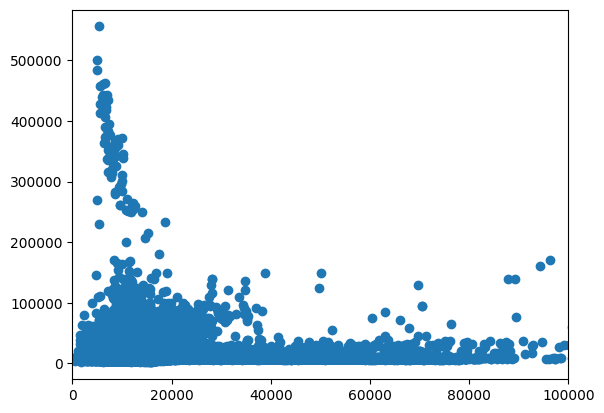

In [226]:
test = df[df['teff'] < 5000]
plt.scatter(df['radius'], df['teff'])
#plt.scatter(R1, T1)
#plt.ylim(0,10000)
plt.xlim(0, 1e5)

In [ ]:
np.max(T1)

5820.733202681438

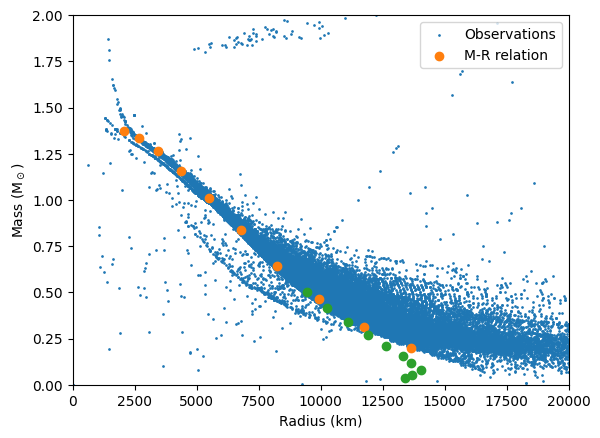

In [227]:
plt.scatter(df['radius'], df['mass'],s=0.9, label='Observations')
plt.scatter(R0, M0, label=("M-R relation"))
#plt.scatter(R1, M1)
#plt.scatter(R2, M2)
plt.scatter(R3, M3)
#plt.scatter(R1, M1)
plt.ylim(0, 2)
plt.xlim(0, 2e4)
plt.xlabel("Radius (km)")
plt.ylabel(r"Mass (M$_\odot$)")  
plt.legend()

In [233]:
wd.rbar2r(wd.dr)

0.386

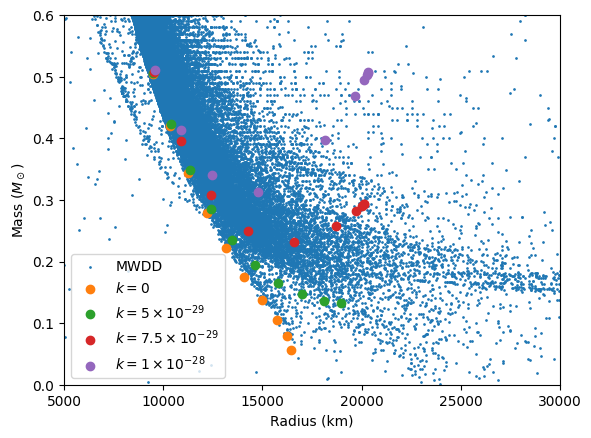

In [89]:
plt.scatter(df['radius'], df['mass'],s=0.9, label='MWDD')
plt.scatter(R0, M0, label=r"$k=0$")
plt.scatter(R2, M2, label=r"$k=5\times10^{-29}$")
plt.scatter(R3, M3, label=r"$k=7.5\times10^{-29}$")
plt.scatter(R1, M1, label=r"$k=1\times10^{-28}$")
#plt.plot(R1, M1, '-o', color='yellow', label=r"$k=2\times10^{-28}$")
#plt.scatter(R1, M1, )
plt.ylim(0,0.6)
plt.xlim(5000, 30000)
plt.xlabel('Radius (km)')
plt.ylabel(r"Mass ($M_\odot$)")
plt.legend()